In [1]:
import numpy as np



In [10]:
arr  = np.load('4_points_states_cache_v2.npy')

In [11]:
arr.shape

(27, 1)

In [12]:
# ignore 24 and 30

arr


array([[ 0.03162044],
       [ 0.42673258],
       [ 6.13673205],
       [ 1.67762695],
       [ 1.21246815],
       [ 0.08333242],
       [ 1.00697195],
       [-0.66587445],
       [-1.31499059],
       [ 1.6811468 ],
       [ 0.11492213],
       [ 0.09405347],
       [-0.22831631],
       [ 2.06243989],
       [ 1.7168379 ],
       [ 0.79496225],
       [ 2.03463085],
       [ 1.74927704],
       [-0.40472399],
       [-0.02032564],
       [ 3.4845992 ],
       [-0.61953307],
       [ 1.06725265],
       [ 3.32574438],
       [ 0.46048496],
       [-0.61797641],
       [ 5.05989743]])

In [13]:
tags_x = []
tags_y = []
tags_theta = []

for i in range(3,len(arr), 3):
    tags_x.append(arr[i])
    tags_y.append(arr[i+1])
    tags_theta.append(arr[i+2])
   

In [14]:
tags_x

[array([1.67762695]),
 array([1.00697195]),
 array([1.6811468]),
 array([-0.22831631]),
 array([0.79496225]),
 array([-0.40472399]),
 array([-0.61953307]),
 array([0.46048496])]

In [15]:
tags_y

[array([1.21246815]),
 array([-0.66587445]),
 array([0.11492213]),
 array([2.06243989]),
 array([2.03463085]),
 array([-0.02032564]),
 array([1.06725265]),
 array([-0.61797641])]

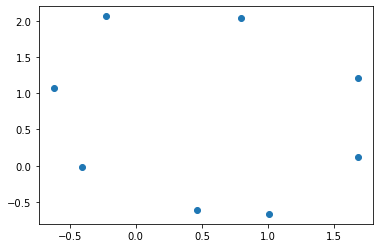

In [18]:
import matplotlib.pyplot as plt

plt.scatter(tags_x, tags_y)
plt.show()

In [38]:
tags_x[0]

array([1.67762695])

In [39]:
tags_y[0]

array([1.21246815])

In [36]:
# covs  = np.load('4_points_P_cache_v2.npy')
covs  = np.load('8_points_P_cache.npy')


In [40]:
covs

array([[8.8e-04, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 8.8e-04, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 8.0e-07, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+

In [37]:
covs_list = []
for i in range(covs.shape[0]):
    covs_list.append(covs[i,i])
covs_list
    

[0.0008800000000000013,
 0.0008800000000000013,
 8.000000000000006e-07,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [22]:
def confidence_ellipse(x, y, ax, n_std=3, **kwargs):
    """
    Create a plot of the covariation confidence ellipse op `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data

    Returns
    -------
    float: the Pearson Correlation Coefficient for `x` and `y`.

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties

    author : Carsten Schelp
    license: GNU General Public License v3.0 (https://github.com/CarstenSchelp/CarstenSchelp.github.io/blob/master/LICENSE)
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1,1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width=ell_radius_x * 2, height=ell_radius_y * 2, **kwargs)

    # calculating the stdandarddeviation of x from  the squareroot of the variance
    # np.sqrt(cov[0, 0])
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # calculating the stdandarddeviation of y from  the squareroot of the variance
    # np.sqrt(cov[1, 1])
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
        
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
        
    return pearson        
    # render plot with "plt.show()".

In [26]:
np.array(tags_y).shape

(8, 1)

In [24]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ellipse = Ellipse((tags_x[0], tags_y[1] ), width=, height=ell_radius_y * 2, **kwargs)
# pearson = confidence_ellipse(np.array(tags_x),np.array(tags_y) , ax, facecolor='none', edgecolor='red')
plt.show()

/tmp/ipykernel_272/3946428289.py:24: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(x, y)
/home/vicaran93/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/vicaran93/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


ValueError: need at least one array to concatenate

<Figure size 360x360 with 1 Axes>